___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" 
alt="CLRSWY"></p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#9d4f8c; font-size:100%; text-align:center; border-radius:10px 10px;">WAY TO REINVENT YOURSELF</p>

<img src=https://i.ibb.co/wJW61Y2/Used-cars.jpg width="700" height="200">

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Capstone Project of Data Analytics Module</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>

# WELCOME!

## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

The project consists of 3 parts:
* First part is related with 'data cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, Dropping useless columns.
* Second part is related with 'filling data'. It deals with Missing Values. Categorical to numeric transformation is done.
* Third part is related with 'handling outliers of data' via Visualisation libraries. Some insights are extracted.


In [2336]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore") 
warnings.warn("this will not show")

%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid") 
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 150 
pd.options.display.max_columns = 100
import json
import regex as re
from datetime import date
from datetime import datetime
from datetime import timedelta

In [2337]:
#df.to_excel('scout_car_dropped.xlsx')
##convert json to excel

# PART- 1 `( Data Cleaning )`

In [2338]:
df0 = pd.read_json("scout_car.json",lines=True)
df = df0.copy()
df.head().T

,0,1,2,3,4
url,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...,https://www.autoscout24.com//offers/audi-a1-1-...,https://www.autoscout24.com//offers/audi-a1-sp...
make_model,Audi A1,Audi A1,Audi A1,Audi A1,Audi A1
short_description,Sportback 1.4 TDI S-tronic Xenon Navi Klima,1.8 TFSI sport,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,1.4 TDi Design S tronic,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...
body_type,Sedans,Sedans,Sedans,Sedans,Sedans
price,15770,14500,14640,14500,16790
vat,VAT deductible,Price negotiable,VAT deductible,None,None
km,"56,013 km","80,000 km","83,450 km","73,000 km","16,200 km"
registration,01/2016,03/2017,02/2016,08/2016,05/2016
prev_owner,2 previous owners,None,1 previous owner,1 previous owner,1 previous owner
kW,NaN,NaN,NaN,NaN,NaN


In [2339]:
df.head()

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",[],\nAudi\n,"[\n, A1, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...","[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,NaN,NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,"83,450 km",02/2016,1 previous owner,NaN,85 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]",NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",[\nAM-95365\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...","[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,"73,000 km",08/2016,1 previous owner,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]","[\n, \n, \nEuro 6\n]",[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2016, \n]","[\n, Brown, \n]",[\nMetallic\n],NaN,NaN,"[\n, Sedans, \n]",[\n3\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[

In [2340]:
df.shape

(15919, 54)

In [2341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            15919 non-null  object 
 1   make_model                     15919 non-null  object 
 2   short_description              15873 non-null  object 
 3   body_type                      15859 non-null  object 
 4   price                          15919 non-null  int64  
 5   vat                            11406 non-null  object 
 6   km                             15919 non-null  object 
 7   registration                   15919 non-null  object 
 8   prev_owner                     9091 non-null   object 
 9   kW                             0 non-null      float64
 10  hp                             15919 non-null  object 
 11  Type                           15917 non-null  object 
 12  Previous Owners                9279 non-null  

In [2342]:
df.columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'registration', 'prev_owner', 'kW', 'hp', 'Type',
       'Previous Owners', 'Next Inspection', 'Inspection new', 'Warranty',
       'Full Service', 'Non-smoking Vehicle', 'null', 'Make', 'Model',
       'Offer Number', 'First Registration', 'Body Color', 'Paint Type',
       'Body Color Original', 'Upholstery', 'Body', 'Nr. of Doors',
       'Nr. of Seats', 'Model Code', 'Gearing Type', 'Displacement',
       'Cylinders', 'Weight', 'Drive chain', 'Fuel', 'Consumption',
       'CO2 Emission', 'Emission Class', '\nComfort & Convenience\n',
       '\nEntertainment & Media\n', '\nExtras\n', '\nSafety & Security\n',
       'description', 'Emission Label', 'Gears', 'Country version',
       'Electricity consumption', 'Last Service Date', 'Other Fuel Types',
       'Availability', 'Last Timing Belt Service Date', 'Available from'],
      dtype='object')

## Fixing Headers

In [2343]:
#pip install skimpy

In [2344]:
from skimpy import clean_columns

In [2345]:
df= clean_columns(df)

In [2346]:
df.head()

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,k_w,hp,type,previous_owners,next_inspection,inspection_new,warranty,full_service,non_smoking_vehicle,null,make,model,offer_number,first_registration,body_color,paint_type,body_color_original,upholstery,body,nr_of_doors,nr_of_seats,model_code,gearing_type,displacement,cylinders,weight,drive_chain,fuel,consumption,co_2_emission,emission_class,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,description,emission_label,gears,country_version,electricity_consumption,last_service_date,other_fuel_types,availability,last_timing_belt_service_date,available_from
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",[],\nAudi\n,"[\n, A1, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...","[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,NaN,NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,"83,450 km",02/2016,1 previous owner,NaN,85 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]",NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",[\nAM-95365\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...","[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,"73,000 km",08/2016,1 previous owner,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]","[\n, \n, \nEuro 6\n]",[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2016, \n]","[\n, Brown, \n]",[\nMetallic\n],NaN,NaN,"[\n, Sedans, \n]",[\n3\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (c

### Another way of fixing headers

In [2347]:
# df.rename(columns={"\nComfort & Convenience\n":"Comfort & Convenience",
#                   "\nEntertainment & Media\n":"Entertainment & Media",
#                   "\nExtras\n":"Extras",
#                   "\nSafety & Security\n":"Safety & Security"})

In [2348]:
df.head(1).T

,0
url,https://www.autoscout24.com//offers/audi-a1-sp...
make_model,Audi A1
short_description,Sportback 1.4 TDI S-tronic Xenon Navi Klima
body_type,Sedans
price,15770
vat,VAT deductible
km,"56,013 km"
registration,01/2016
prev_owner,2 previous owners
k_w,NaN


### Third Way of Fixing Headers

In [2349]:
# df["Comfort & Convenience"]=df["\nComfort & Convenience\n"]
# df["Entertainment & Media"]=df["\nEntertainment & Media\n"]
# df["Extras"]=df["\nExtras\n"]
# df["Safety & Security"]=df["\nSafety & Security\n"]

In [2350]:
# #then we need to delete old columns that we corrected 
# drop_columns=["\nComfort & Convenience\n","\nEntertainment & Media\n","\nExtras\n","\nSafety & Security\n"]
# df.drop(drop_columns, axis=1, inplace=True) 

# Dropping Columns that have more than 90% null

In [2351]:
def df_nans(df, limit):
    missing = df.isnull().sum()*100 / df.shape[0]
    return missing.loc[lambda x : x >= limit]

def column_nans(serial):
    # display percentage of nans in a Series
    return serial.isnull().sum()*100 / serial.shape[0]

In [2352]:
df_nans(df, 90)

k_w                             100.000
electricity_consumption          99.139
last_service_date                96.445
other_fuel_types                 94.472
availability                     96.011
last_timing_belt_service_date    99.899
available_from                   98.291
dtype: float64

## Working with Null Values

In [2353]:
df.isnull().sum()   #assuming that all NaN values are written correctly

url                                  0
make_model                           0
short_description                   46
body_type                           60
price                                0
vat                               4513
km                                   0
registration                         0
prev_owner                        6828
k_w                              15919
hp                                   0
type                                 2
previous_owners                   6640
next_inspection                  12384
inspection_new                   11987
warranty                          5420
full_service                      7704
non_smoking_vehicle               8742
null                                 0
make                                 0
model                                0
offer_number                      3175
first_registration                1597
body_color                         597
paint_type                        5772
body_color_original      

In [2354]:
# df.isnull().sum()/len(df)*100 #percentage of missing values per columns
df.isnull().sum()/df.shape[0]*100

url                               0.000
make_model                        0.000
short_description                 0.289
body_type                         0.377
price                             0.000
vat                              28.350
km                                0.000
registration                      0.000
prev_owner                       42.892
k_w                             100.000
hp                                0.000
type                              0.013
previous_owners                  41.711
next_inspection                  77.794
inspection_new                   75.300
warranty                         34.047
full_service                     48.395
non_smoking_vehicle              54.916
null                              0.000
make                              0.000
model                             0.000
offer_number                     19.945
first_registration               10.032
body_color                        3.750
paint_type                       36.259


In [2355]:
# function to return limit percent of missing values
def show_nans(df, limit):
    missing = df.isnull().sum()*100/df.shape[0]
    return missing.loc[lambda x : x >= limit]
show_nans(df,90)

k_w                             100.000
electricity_consumption          99.139
last_service_date                96.445
other_fuel_types                 94.472
availability                     96.011
last_timing_belt_service_date    99.899
available_from                   98.291
dtype: float64

## Dropping columns that have missing values more than ???

# Examination Of Colomns

## url

In [2356]:
df['url'][0]

'https://www.autoscout24.com//offers/audi-a1-sportback-1-4-tdi-s-tronic-xenon-navi-klima-diesel-black-bdab349a-caa5-41b0-98eb-c1345b84445e'

In [2357]:
# drop  url column ???

## make_model vs Make vs Model 

In [2358]:
df['make_model'].value_counts()

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

In [2359]:
df['make'].value_counts()

\nOpel\n       7343
\nAudi\n       5712
\nRenault\n    2864
Name: make, dtype: int64

In [2360]:
df['make'].isnull().sum() 

0

In [2361]:
df['model'].value_counts()

[\n, A3, \n]          3097
[\n, A1, \n]          2614
[\n, Insignia, \n]    2598
[\n, Astra, \n]       2526
[\n, Corsa, \n]       2219
[\n, Clio, \n]        1839
[\n, Espace, \n]       991
[\n, Duster, \n]        34
[\n, A2, \n]             1
Name: model, dtype: int64

In [2362]:
# A2 ve Duster drop edilebilir

In [2363]:
df['model'].isnull().sum()

0

In [2364]:
df[["make","model",'make_model']].sample(10)

,make,model,make_model
11065,\nOpel\n,"[\n, Insignia, \n]",Opel Insignia
12080,\nOpel\n,"[\n, Insignia, \n]",Opel Insignia
7450,\nOpel\n,"[\n, Astra, \n]",Opel Astra
11985,\nOpel\n,"[\n, Insignia, \n]",Opel Insignia
3016,\nAudi\n,"[\n, A3, \n]",Audi A3
5667,\nAudi\n,"[\n, A3, \n]",Audi A3
3775,\nAudi\n,"[\n, A3, \n]",Audi A3
13710,\nRenault\n,"[\n, Clio, \n]",Renault Clio
8101,\nOpel\n,"[\n, Astra, \n]",Opel Astra
6662,\nOpel\n,"[\n, Astra, \n]",Opel Astra


In [2365]:
## make ve model drop 

In [2366]:
df[df["model"]=="A2"]

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,k_w,hp,type,previous_owners,next_inspection,inspection_new,warranty,full_service,non_smoking_vehicle,null,make,model,offer_number,first_registration,body_color,paint_type,body_color_original,upholstery,body,nr_of_doors,nr_of_seats,model_code,gearing_type,displacement,cylinders,weight,drive_chain,fuel,consumption,co_2_emission,emission_class,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,description,emission_label,gears,country_version,electricity_consumption,last_service_date,other_fuel_types,availability,last_timing_belt_service_date,available_from


#### Removing \n and [\n 

In [2367]:
# df["make"]=df["make"].replace("\\n","", regex=True)
# df["make"].value_counts()

#### 2nd method

In [2368]:
df["make"] = df.make.str.strip('\n')

In [2369]:
df.make

0           Audi
1           Audi
2           Audi
3           Audi
4           Audi
          ...   
15914    Renault
15915    Renault
15916    Renault
15917    Renault
15918    Renault
Name: make, Length: 15919, dtype: object

#### 3rd method

In [2370]:
def remove(x):
    if type(x)==float:
        return np.nan
    else:
        return x[1]

In [2371]:
df.model

0            [\n, A1, \n]
1            [\n, A1, \n]
2            [\n, A1, \n]
3            [\n, A1, \n]
4            [\n, A1, \n]
               ...       
15914    [\n, Espace, \n]
15915    [\n, Espace, \n]
15916    [\n, Espace, \n]
15917    [\n, Espace, \n]
15918    [\n, Espace, \n]
Name: model, Length: 15919, dtype: object

In [2372]:
#df.model = df["model"].apply(remove)

In [2373]:
df.model

0            [\n, A1, \n]
1            [\n, A1, \n]
2            [\n, A1, \n]
3            [\n, A1, \n]
4            [\n, A1, \n]
               ...       
15914    [\n, Espace, \n]
15915    [\n, Espace, \n]
15916    [\n, Espace, \n]
15917    [\n, Espace, \n]
15918    [\n, Espace, \n]
Name: model, Length: 15919, dtype: object

In [2374]:
df[["make","model",'make_model']].head()

,make,model,make_model
0,Audi,"[\n, A1, \n]",Audi A1
1,Audi,"[\n, A1, \n]",Audi A1
2,Audi,"[\n, A1, \n]",Audi A1
3,Audi,"[\n, A1, \n]",Audi A1
4,Audi,"[\n, A1, \n]",Audi A1


In [2375]:
df.model = df['model'].apply(lambda x: np.nan if type(x)==float else x[1])

In [2376]:
df.model.value_counts()

A3          3097
A1          2614
Insignia    2598
Astra       2526
Corsa       2219
Clio        1839
Espace       991
Duster        34
A2             1
Name: model, dtype: int64

In [2377]:
df.drop(["make", "model"], axis=1, inplace=True)

## short_description vs description 

In [2378]:
df['short_description'].value_counts()

SPB 1.6 TDI 116 CV S tronic Sport                 64
1.4 66kW (90CV) Selective                         40
MOVE KLIMA CD USB ALLWETTER BLUETOOTH             38
SPB 30 TDI S tronic Business                      35
SPB 30 TFSI S tronic Admired                      35
                                                  ..
K Sports Tourer Business **Navi*Voll**             1
1.0 Turbo ecoFLEX Automatic Elective Park Navi     1
1.6 CDTI Business *Navi*Automatik*Spurh.*          1
1.6 136 CV Automatica Navi E 6 Garanzia Full       1
TCe 225 EDC GPF LIM Deluxe Pano,RFK                1
Name: short_description, Length: 10001, dtype: int64

In [2379]:
df['short_description'].isnull().sum() 

46

In [2380]:
df.drop(["description"], axis=1, inplace=True)

## body_type vs Body

In [2381]:
df['body_type'].value_counts()

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [2382]:
df['body_type'].isnull().sum() 

60

In [2383]:
df['body'].value_counts()

[\n, Sedans, \n]           7903
[\n, Station wagon, \n]    3553
[\n, Compact, \n]          3153
[\n, Van, \n]               783
[\n, Other, \n]             290
[\n, Transporter, \n]        88
[\n, Off-Road, \n]           56
[\n, Coupe, \n]              25
[\n, Convertible, \n]         8
Name: body, dtype: int64

In [2384]:
df['body'].isnull().sum() 

60

In [2385]:
df["body"].str[1]

0        Sedans
1        Sedans
2        Sedans
3        Sedans
4        Sedans
          ...  
15914       Van
15915       Van
15916       Van
15917       Van
15918       Van
Name: body, Length: 15919, dtype: object

#### Fixing \n 

In [2386]:
df["body"]=df["body"].apply(remove)

In [2387]:
df.body

0        Sedans
1        Sedans
2        Sedans
3        Sedans
4        Sedans
          ...  
15914       Van
15915       Van
15916       Van
15917       Van
15918       Van
Name: body, Length: 15919, dtype: object

In [2388]:
## 2nd way
#df.body = df["body"].str[1]


In [2389]:
df.type

0                  [, Used, , Diesel (Particulate Filter)]
1                                     [, Used, , Gasoline]
2                  [, Used, , Diesel (Particulate Filter)]
3                  [, Used, , Diesel (Particulate Filter)]
4                  [, Used, , Diesel (Particulate Filter)]
                               ...                        
15914               [, New, , Diesel (Particulate Filter)]
15915    [, Used, , Super 95 / Super Plus 98 (Particula...
15916                         [, Pre-registered, , Diesel]
15917                         [, Pre-registered, , Diesel]
15918                        [, Demonstration, , Super 95]
Name: type, Length: 15919, dtype: object

### Body Type cleaning

In [2390]:
df.body_type

0        Sedans
1        Sedans
2        Sedans
3        Sedans
4        Sedans
          ...  
15914       Van
15915       Van
15916       Van
15917       Van
15918       Van
Name: body_type, Length: 15919, dtype: object

In [2391]:
df[["body", "body_type"]].sample(10)

,body,body_type
13473,Station wagon,Station wagon
12321,Other,Other
14389,Sedans,Sedans
13421,Sedans,Sedans
13307,Station wagon,Station wagon
11679,Station wagon,Station wagon
10438,Other,Other
15063,Van,Van
11536,Station wagon,Station wagon
8001,Compact,Compact


In [2392]:
df.drop(["body"], axis=1, inplace=True)

## price (target column)

In [2393]:
df['price'].value_counts(dropna=False)

14990    154
15990    151
10990    139
15900    106
17990    102
        ... 
17559      1
17560      1
17570      1
17575      1
39875      1
Name: price, Length: 2956, dtype: int64

In [2394]:
df['price'].isnull().sum() 

0

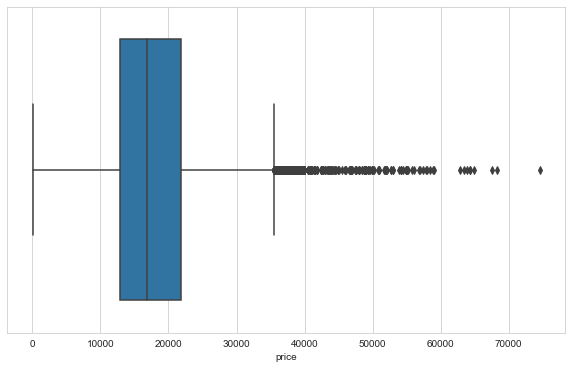

In [2395]:
sns.boxplot(df.price)
plt.show()

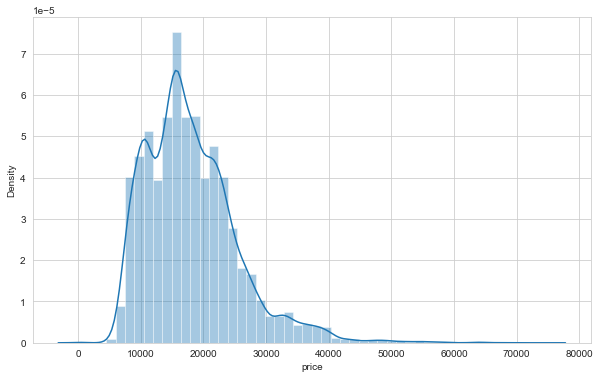

In [2396]:
sns.distplot(df.price);

## vat
The **``"Value Added Tax"``** (VAT) in the European Union is a general, broadly based consumption tax assessed on the value added to goods and services.

In [2397]:
df['vat'].value_counts()

VAT deductible      10980
Price negotiable      426
Name: vat, dtype: int64

In [2398]:
df['vat'].isnull().sum()

4513

In [2399]:
df.vat.sample(10)

4664     VAT deductible
2346     VAT deductible
14778    VAT deductible
564      VAT deductible
7240     VAT deductible
13298              None
6058     VAT deductible
5304     VAT deductible
1209     VAT deductible
7393     VAT deductible
Name: vat, dtype: object

In [2400]:
df.iloc[4676] # random check of vat 

url                              https://www.autoscout24.com//offers/audi-a3-a3...
make_model                                                                 Audi A3
short_description                                           A3 SB 1.0 TFSI intense
body_type                                                                   Sedans
price                                                                        22500
vat                                                                           None
km                                                                       10,395 km
registration                                                               02/2018
prev_owner                                                                    None
k_w                                                                            NaN
hp                                                                           85 kW
type                                                          [, Used, , Gasoline]
prev

## KM

In [2401]:
df['km'].value_counts()

10 km        1045
- km         1024
1 km          367
5 km          170
50 km         148
             ... 
67,469 km       1
43,197 km       1
10,027 km       1
35,882 km       1
57 km           1
Name: km, Length: 6690, dtype: int64

In [2402]:
df['km'].isnull().sum() 

0

In [2403]:
df.km.sample(20)

4631           1 km
1054      12,688 km
9452      45,000 km
13856     90,000 km
6967      83,436 km
5274         300 km
6363      21,379 km
11067     50,000 km
1053       8,400 km
11820     21,961 km
4578      17,900 km
6945      21,896 km
8543      22,729 km
3560      31,992 km
10081         10 km
2575          10 km
3046     123,226 km
992       14,270 km
11779      1,530 km
10574     52,501 km
Name: km, dtype: object

In [2404]:
df.km = df.km.str.replace(',', '').str.extract('(\d{1,8})').astype("float") # str.extract('(\d+)')

In [2405]:
df.dtypes

url                               object
make_model                        object
short_description                 object
body_type                         object
price                              int64
vat                               object
km                               float64
registration                      object
prev_owner                        object
k_w                              float64
hp                                object
type                              object
previous_owners                   object
next_inspection                   object
inspection_new                    object
warranty                          object
full_service                      object
non_smoking_vehicle               object
null                              object
offer_number                      object
first_registration                object
body_color                        object
paint_type                        object
body_color_original               object
upholstery      

### km replace "km, -,  , " to
2nd way

In [2406]:
#df["km"] = df.km.replace({"km":"", "-":0, " ":"", ",":""}, regex=True).astype(int)

In [2407]:
df.km.head()

0   56013.000
1   80000.000
2   83450.000
3   73000.000
4   16200.000
Name: km, dtype: float64

In [2408]:
df.km.value_counts(dropna=False)

10.000       1045
NaN          1024
1.000         367
5.000         170
50.000        148
             ... 
67469.000       1
43197.000       1
10027.000       1
35882.000       1
57.000          1
Name: km, Length: 6690, dtype: int64

## registration and first registration

In [2409]:
df['registration'].value_counts(dropna=False).sum()

15919

In [2410]:
df.registration.head()

0    01/2016
1    03/2017
2    02/2016
3    08/2016
4    05/2016
Name: registration, dtype: object

In [2411]:
df['registration'].isnull().sum() 

0

In [2412]:
df[["registration","first_registration"]].sample(15)

,registration,first_registration
13329,04/2016,"[\n, 2016, \n]"
6913,01/2018,"[\n, 2018, \n]"
1889,05/2019,"[\n, 2019, \n]"
11455,01/2017,"[\n, 2017, \n]"
498,01/2016,"[\n, 2016, \n]"
7218,06/2018,"[\n, 2018, \n]"
4146,03/2017,"[\n, 2017, \n]"
10000,05/2019,"[\n, 2019, \n]"
12104,01/2018,"[\n, 2018, \n]"
15297,04/2019,"[\n, 2019, \n]"


In [2413]:
df["first_registration"].astype('str').value_counts(dropna=False)

['\n', '2018', '\n']    4522
['\n', '2016', '\n']    3674
['\n', '2017', '\n']    3273
['\n', '2019', '\n']    2853
nan                     1597
Name: first_registration, dtype: int64

### Removing \n from First Registration

In [2414]:
df.first_registration = df["first_registration"].str[1].astype("float")

In [2415]:
df["first_registration"].head()

0   2016.000
1   2017.000
2   2016.000
3   2016.000
4   2016.000
Name: first_registration, dtype: float64

In [2416]:
## datetime veya integer yapmali mi ?

### age column yapalim

In [2417]:
df['age'] = 2019 - df["first_registration"]

In [2418]:
df.age.value_counts(dropna=False)

1.000    4522
3.000    3674
2.000    3273
0.000    2853
NaN      1597
Name: age, dtype: int64

In [2419]:
df.drop(["registration", "first_registration"], axis=1, inplace=True)

In [2420]:
df.age

0       3.000
1       2.000
2       3.000
3       3.000
4       3.000
         ... 
15914     NaN
15915   0.000
15916   0.000
15917   0.000
15918   0.000
Name: age, Length: 15919, dtype: float64

## prev_owner vs previous owners

In [2421]:
df['prev_owner'].value_counts(dropna=False)

1 previous owner     8294
None                 6828
2 previous owners     778
3 previous owners      17
4 previous owners       2
Name: prev_owner, dtype: int64

In [2422]:
df['prev_owner'].isnull().sum() 

6828

In [2423]:
df[["prev_owner","previous_owners"]].sample(15)

,prev_owner,previous_owners
9072,2 previous owners,\n2\n
9590,1 previous owner,\n1\n
15229,None,NaN
9442,1 previous owner,\n1\n
4786,1 previous owner,\n1\n
12721,None,NaN
6420,None,NaN
11356,1 previous owner,\n1\n
2450,None,\n0\n
7189,1 previous owner,\n1\n


In [2424]:
df['previous_owners'].isnull().sum() 

6640

### prev_owner get number


In [2425]:
df.prev_owner = df.prev_owner.str.extract('(\d)')

In [2426]:
df.prev_owner.sample(20)

14723    NaN
4238     NaN
2874       1
6847     NaN
334      NaN
741      NaN
3063     NaN
13449      2
10485      2
7747       1
11551      2
8207     NaN
10378      1
244      NaN
14129      1
10700      1
15483    NaN
6467       2
50         1
13939    NaN
Name: prev_owner, dtype: object

In [2427]:
df.prev_owner.value_counts(dropna=False)

1      8294
NaN    6828
2       778
3        17
4         2
Name: prev_owner, dtype: int64

### Previous Owners get number

In [2428]:
df["previous_owners"] = df["previous_owners"].apply(
    lambda x: x[0] if type(x) == list else x).replace('\\n', '', regex=True)
df["previous_owners"]

0          2
1        NaN
2          1
3          1
4          1
        ... 
15914    NaN
15915      1
15916      1
15917    NaN
15918      1
Name: previous_owners, Length: 15919, dtype: object

In [2429]:
df["previous_owners"].value_counts(dropna=False)

1      8294
NaN    6640
2       778
0       188
3        17
4         2
Name: previous_owners, dtype: int64

In [2430]:
df.prev_owner.value_counts()

1    8294
2     778
3      17
4       2
Name: prev_owner, dtype: int64

In [2431]:
df[["prev_owner","previous_owners"]].head(10)

,prev_owner,previous_owners
0,2,2
1,NaN,NaN
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,NaN,NaN


In [2432]:
df["previous_owners"].fillna(df["prev_owner"], inplace=True)

In [2433]:
df.previous_owners.value_counts(dropna=False)

1      8294
NaN    6640
2       778
0       188
3        17
4         2
Name: previous_owners, dtype: int64

In [2434]:
df.drop(["prev_owner", "previous_owners"], axis=1, inplace=True)

## kW

In [2435]:
df.k_w.value_counts()

Series([], Name: k_w, dtype: int64)

In [2436]:
df['k_w'].isnull().sum() 

15919

In [2437]:
df.drop(["k_w"], axis=1, inplace=True)

## hp

In [2438]:
df['hp'].value_counts()

85 kW     2542
66 kW     2122
81 kW     1402
100 kW    1308
110 kW    1112
70 kW      888
125 kW     707
51 kW      695
55 kW      569
118 kW     516
92 kW      466
121 kW     392
147 kW     380
77 kW      345
56 kW      286
54 kW      276
103 kW     253
87 kW      232
165 kW     194
88 kW      177
60 kW      160
162 kW      98
- kW        88
74 kW       81
96 kW       72
71 kW       59
101 kW      47
67 kW       40
154 kW      39
122 kW      35
119 kW      30
164 kW      27
135 kW      24
82 kW       22
52 kW       22
78 kW       20
1 kW        20
294 kW      18
146 kW      18
141 kW      16
57 kW       10
104 kW       8
120 kW       8
191 kW       7
112 kW       7
155 kW       6
117 kW       6
184 kW       5
90 kW        4
76 kW        4
65 kW        4
149 kW       3
80 kW        3
168 kW       3
98 kW        3
93 kW        3
228 kW       2
270 kW       2
53 kW        2
140 kW       2
86 kW        2
167 kW       2
127 kW       2
89 kW        2
143 kW       2
63 kW        2
40 kW     

In [2439]:
df['hp'].isnull().sum() 

0

#### hp cleaning 

In [2440]:
df.hp = df.hp.str.extract('(\d{1,4})').astype('float')

In [2441]:
df.hp.value_counts(dropna=False)

85.000     2542
66.000     2122
81.000     1402
100.000    1308
110.000    1112
70.000      888
125.000     707
51.000      695
55.000      569
118.000     516
92.000      466
121.000     392
147.000     380
77.000      345
56.000      286
54.000      276
103.000     253
87.000      232
165.000     194
88.000      177
60.000      160
162.000      98
NaN          88
74.000       81
96.000       72
71.000       59
101.000      47
67.000       40
154.000      39
122.000      35
119.000      30
164.000      27
135.000      24
82.000       22
52.000       22
78.000       20
1.000        20
294.000      18
146.000      18
141.000      16
57.000       10
104.000       8
120.000       8
191.000       7
112.000       7
155.000       6
117.000       6
184.000       5
90.000        4
76.000        4
65.000        4
149.000       3
80.000        3
168.000       3
98.000        3
93.000        3
228.000       2
270.000       2
53.000        2
140.000       2
86.000        2
167.000       2
127.000 

## Type

In [2442]:
df['type'].astype("str").value_counts()

['', 'Used', '', 'Diesel (Particulate Filter)']                                                                                 3475
['', 'Used', '', 'Diesel']                                                                                                      2516
['', 'Used', '', 'Gasoline']                                                                                                    2367
['', 'Used', '', 'Super 95']                                                                                                    1818
['', 'Pre-registered', '', 'Super 95']                                                                                           500
                                                                                                                                ... 
['', 'New', '', 'Regular/Benzine 91 / Super 95 / Super Plus 98 / Regular/Benzine E10 91 / Super Plus E10 98 / Super E10 95']       1
['', 'Used', '', 'Super 95 / Super Plus 98 / Super E10 95 / Super Plu

In [2443]:
df['type'].isnull().sum() 

2

### Cleaning 

In [2444]:
#df.type.apply(pd.Series).stack().value_counts()

In [2445]:
#pd.value_counts(np.hstack(df.type.values))

In [2446]:
df["type"] = df.type.str[1]

In [2447]:
df.type.value_counts()

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
Name: type, dtype: int64

In [2448]:
#df.type = df.type.str[3].str.split("/").str[0].str.strip()


In [2449]:
#df.type = df.type.str.split(" ").str[0].str.strip()


## Next Inspection & Inspection new

In [2450]:
df[["next_inspection","inspection_new"]].sample(15)

,next_inspection,inspection_new
13934,NaN,NaN
11184,NaN,NaN
11110,NaN,NaN
11421,NaN,NaN
8396,"[\n06/2021\n, \n149 g CO2/km (comb)\n]",NaN
7495,NaN,NaN
15276,NaN,NaN
9134,NaN,NaN
15226,"[\n03/2021\n, \n123 g CO2/km (comb)\n]",NaN
12514,"[\n03/2022\n, \n151 g CO2/km (comb)\n]",NaN


In [2451]:
df[["next_inspection","inspection_new"]].isnull().sum() 

next_inspection    12384
inspection_new     11987
dtype: int64

In [2452]:
df["next_inspection"].value_counts()

\n04/2022\n                               62
\n03/2021\n                               38
\n03/2022\n                               36
\n06/2021\n                               34
\n01/2022\n                               32
                                          ..
[\n12/2018\n, \n97 g CO2/km (comb)\n]      1
[\n03/2022\n, \n1 (No sticker)\n]          1
[\n05/2021\n, \n93 g CO2/km (comb)\n]      1
[\n06/2021\n, \n93 g CO2/km (comb)\n]      1
[\n01/2022\n, \n168 g CO2/km (comb)\n]     1
Name: next_inspection, Length: 1399, dtype: int64

In [2453]:
df["inspection_new"].value_counts()

[\nYes\n, \nEuro 6\n]                                                                          523
\nYes\n                                                                                        362
[\nYes\n, \n102 g CO2/km (comb)\n]                                                             174
[\nYes\n, \n4 (Green)\n]                                                                       166
[\nYes\n, \nEuro 6d-TEMP\n]                                                                    134
                                                                                              ... 
[\nYes\n, \n, 5.2 l/100 km (comb), \n, 6.7 l/100 km (city), \n, 4.2 l/100 km (country), \n]      1
[\nYes\n, \n100 g CO2/km (comb)\n]                                                               1
[\nYes\n, \n, 4.9 l/100 km (comb), \n, 5.9 l/100 km (city), \n, 4.3 l/100 km (country), \n]      1
[\nYes\n, \n, 5.1 l/100 km (comb), \n, 6.4 l/100 km (city), \n, 4.3 l/100 km (country), \n]      1
[\nYes\n, 

### Cleaning


In [2454]:
df.next_inspection = df["next_inspection"].str.extract('(\d\d/\d\d\d\d)')

In [2455]:
df.next_inspection.value_counts(dropna=False)

NaN        15209
04/2022       62
03/2021       38
03/2022       36
06/2021       34
01/2022       32
04/2021       29
05/2022       27
05/2021       27
03/2020       25
05/2019       23
02/2021       19
01/2023       19
02/2020       18
09/2021       17
02/2022       16
04/2020       16
01/2021       15
01/2020       15
06/2022       14
07/2019       13
07/2020       13
04/2019       13
05/2020       12
11/2020       12
02/2023       10
09/2019        9
03/2023        8
08/2022        8
07/2021        8
06/2020        8
03/2019        8
08/2019        7
12/2019        7
07/2022        7
06/2019        7
08/2020        6
11/2019        6
09/2020        6
10/2018        5
08/2021        5
12/2018        4
10/2021        4
02/2019        4
10/2019        4
03/2017        3
12/2020        3
10/2020        3
04/2023        3
06/2016        2
04/2017        2
11/2021        2
05/2023        2
12/2021        2
10/2022        2
01/1999        1
01/1955        1
05/2016        1
06/2018       

In [2456]:
#df.next_inspection=df['next_inspection'].replace('NaT',np.nan,regex=True)

In [2457]:
df.next_inspection = pd.to_datetime(df.next_inspection, format="%m/%Y")

### inspection new

In [2458]:
df.inspection_new.value_counts()

[\nYes\n, \nEuro 6\n]                                                                          523
\nYes\n                                                                                        362
[\nYes\n, \n102 g CO2/km (comb)\n]                                                             174
[\nYes\n, \n4 (Green)\n]                                                                       166
[\nYes\n, \nEuro 6d-TEMP\n]                                                                    134
                                                                                              ... 
[\nYes\n, \n, 5.2 l/100 km (comb), \n, 6.7 l/100 km (city), \n, 4.2 l/100 km (country), \n]      1
[\nYes\n, \n100 g CO2/km (comb)\n]                                                               1
[\nYes\n, \n, 4.9 l/100 km (comb), \n, 5.9 l/100 km (city), \n, 4.3 l/100 km (country), \n]      1
[\nYes\n, \n, 5.1 l/100 km (comb), \n, 6.4 l/100 km (city), \n, 4.3 l/100 km (country), \n]      1
[\nYes\n, 

In [2459]:
df.inspection_new=df.inspection_new.replace("\\n","", regex=True)

In [2460]:
df["inspection_new"] = [item[0] if type(item) == list else item for item in df["inspection_new"]]
# ## hepsini liste disina cikaracak4


# df["previous_owners"]= df["previous_owners"].str.strip("\n").astype('float')

In [2461]:
df.inspection_new.value_counts(dropna=False)

NaN        11987
\nYes\n     3570
Yes          362
Name: inspection_new, dtype: int64

In [2462]:
df.drop(["next_inspection", "inspection_new"], axis=1, inplace=True)

## CO2 Emission vs Emission Class vs Emission Label

In [2463]:
df[["emission_label", 'co_2_emission', 'emission_class']].sample(10)

,emission_label,co_2_emission,emission_class
1437,NaN,[\n102 g CO2/km (comb)\n],[\nEuro 6\n]
2420,NaN,[\n104 g CO2/km (comb)\n],NaN
6077,NaN,[\n95 g CO2/km (comb)\n],[\nEuro 6\n]
3955,NaN,[\n111 g CO2/km (comb)\n],[\nEuro 6\n]
8512,NaN,[\n139 g CO2/km (comb)\n],[\nEuro 6\n]
13230,NaN,[\n120 g CO2/km (comb)\n],[\nEuro 6\n]
274,NaN,[\n102 g CO2/km (comb)\n],[\nEuro 6\n]
1552,NaN,[\n98 g CO2/km (comb)\n],[\nEuro 6\n]
2476,NaN,[\n105 g CO2/km (comb)\n],[\nEuro 6d-TEMP\n]
6243,NaN,[\n98 g CO2/km (comb)\n],[\nEuro 6\n]


In [2464]:
df[["emission_label", 'co_2_emission', 'emission_class']].isnull().sum()

emission_label    11934
co_2_emission      1808
emission_class     3021
dtype: int64

In [2465]:
df["emission_label"].value_counts()

[\n4 (Green)\n]         3553
[\n1 (No sticker)\n]     381
[[], [], []]              40
[\n5 (Blue)\n]             8
[\n3 (Yellow)\n]           2
[\n2 (Red)\n]              1
Name: emission_label, dtype: int64

In [2466]:
df.co_2_emission.value_counts(dropna=False)

NaN                             1808
[\n120 g CO2/km (comb)\n]        740
[[], [], []]                     628
[\n99 g CO2/km (comb)\n]         545
[\n97 g CO2/km (comb)\n]         537
[\n104 g CO2/km (comb)\n]        501
[\n102 g CO2/km (comb)\n]        477
[\n103 g CO2/km (comb)\n]        445
[\n114 g CO2/km (comb)\n]        382
[\n124 g CO2/km (comb)\n]        372
[\n107 g CO2/km (comb)\n]        362
[\n108 g CO2/km (comb)\n]        362
[\n119 g CO2/km (comb)\n]        361
[\n106 g CO2/km (comb)\n]        349
[\n128 g CO2/km (comb)\n]        329
[\n126 g CO2/km (comb)\n]        282
[\n85 g CO2/km (comb)\n]         275
[\n118 g CO2/km (comb)\n]        270
[\n110 g CO2/km (comb)\n]        266
[\n127 g CO2/km (comb)\n]        257
[\n117 g CO2/km (comb)\n]        254
[\n111 g CO2/km (comb)\n]        237
[\n113 g CO2/km (comb)\n]        235
[\n109 g CO2/km (comb)\n]        234
[\n139 g CO2/km (comb)\n]        224
[\n140 g CO2/km (comb)\n]        218
[\n129 g CO2/km (comb)\n]        213
[

### Cleaning co_2_emission


In [2467]:
df["co_2_emission"] = [item[0] if type(item) == list else item for item in df["co_2_emission"]]
# ## hepsini liste disina cikaracak4


In [2468]:
df["co_2_emission"]= df["co_2_emission"].str.strip("\n")

In [2469]:
df.co_2_emission= df["co_2_emission"].str.extract('(\\d+)')

In [2470]:
df.co_2_emission.value_counts(dropna=False)

NaN    2436
120     740
99      545
97      537
104     501
102     477
103     445
114     382
124     372
107     362
108     362
119     361
106     349
128     329
126     282
85      275
118     270
110     266
127     257
117     254
111     237
113     235
109     234
139     224
140     218
129     213
135     202
105     202
92      198
130     180
123     178
150     174
143     171
112     171
95      161
116     157
141     156
98      151
133     145
136     145
137     133
125     132
134     130
145     126
149     117
153     113
147     109
101     105
132     100
115      86
122      83
121      82
138      75
93       66
168      58
142      58
148      48
131      48
154      40
144      40
94       37
100      36
146      36
90       35
151      34
91       31
186      30
152      28
187      26
172      25
82       25
96       22
189      19
89       19
157      18
158      17
88       15
169      15
156      14
164      13
161      10
170      10
175       8
155 

In [2471]:
#df.co_2_emission = df.co_2_emission.str.extract("(\d+)").value_counts()

### Emission Class cleaning

In [2472]:
df.emission_class.value_counts()

[\nEuro 6\n]          10139
[\nEuro 6d-TEMP\n]     1845
[[], [], []]            607
[\nEuro 6c\n]           127
[\nEuro 5\n]             78
[\nEuro 6d\n]            62
[\nEuro 4\n]             40
Name: emission_class, dtype: int64

In [2473]:
df.emission_class.head()

0    [\nEuro 6\n]
1    [\nEuro 6\n]
2    [\nEuro 6\n]
3    [\nEuro 6\n]
4    [\nEuro 6\n]
Name: emission_class, dtype: object

In [2474]:
df["emission_class"] = [item[0] if type(item) == list else item for item in df["emission_class"]]


In [2475]:
df.emission_class = df["emission_class"].str.replace("\n","")

In [2476]:
df.emission_class.value_counts()

Euro 6          10139
Euro 6d-TEMP     1845
Euro 6c           127
Euro 5             78
Euro 6d            62
Euro 4             40
Name: emission_class, dtype: int64

In [2477]:
df[["emission_label", 'co_2_emission', 'emission_class']].sample(10)

,emission_label,co_2_emission,emission_class
3906,NaN,103,Euro 6
3593,NaN,189,Euro 6
10690,NaN,169,Euro 5
4898,[\n4 (Green)\n],NaN,NaN
9437,NaN,120,Euro 6
7394,NaN,107,Euro 6
6268,NaN,92,Euro 6
7220,NaN,128,Euro 6
14303,[\n4 (Green)\n],118,Euro 6
1688,NaN,112,Euro 6


### Emission label

In [2478]:
df.emission_label

0                    NaN
1        [\n4 (Green)\n]
2        [\n4 (Green)\n]
3                    NaN
4                    NaN
              ...       
15914                NaN
15915                NaN
15916                NaN
15917                NaN
15918    [\n4 (Green)\n]
Name: emission_label, Length: 15919, dtype: object

In [2479]:
df.emission_label.value_counts(dropna=False)

NaN                     11934
[\n4 (Green)\n]          3553
[\n1 (No sticker)\n]      381
[[], [], []]               40
[\n5 (Blue)\n]              8
[\n3 (Yellow)\n]            2
[\n2 (Red)\n]               1
Name: emission_label, dtype: int64

In [2480]:
df["CO2_Emission"] = df['co_2_emission'].str[0].str.strip().str.replace(',', '').str.extract('(\d+)').astype('float')


In [2481]:
df.drop(["emission_label", 'co_2_emission', 'emission_class'], axis=1, inplace=True)

## Warranty

In [2482]:
df['warranty'].value_counts(dropna=False)

NaN                                                                                                5420
[\n, \n, \nEuro 6\n]                                                                               1868
\n12 months\n                                                                                      1177
\n                                                                                                  979
\n24 months\n                                                                                       566
                                                                                                   ... 
[\n72 months\n, \n125 g CO2/km (comb)\n]                                                              1
[\n60 months\n, \n14 g CO2/km (comb)\n]                                                               1
[\n24 months\n, \n121 g CO2/km (comb)\n]                                                              1
[\n12 months\n, \nEuro 6d\n]                                    

In [2483]:
df['warranty'].isnull().sum() 

5420

### Warranty cleaning


In [2484]:
df.warranty = [item[0] if type(item) == list else item for item in df["warranty"]]
# ## hepsini liste disina cikaracak4


In [2485]:
df["warranty"] = df.warranty.apply(lambda x : x[0] if type(x)==list else x)

df["warranty"] = df.warranty.str.strip("\n").str.extract('(\d{1,2})').astype("float") # str.extract('(\d+)')

In [2486]:
#df.warranty = df["warranty"].str.strip("\n")

In [2487]:
#df.warranty = df["warranty"].str.extract('(\\d+)').astype(float)

In [2488]:
df.warranty.value_counts(dropna=False)

NaN       11066
12.000     2594
24.000     1118
60.000      401
36.000      279
48.000      149
6.000       125
72.000       59
3.000        33
23.000       11
18.000       10
20.000        7
25.000        6
2.000         5
50.000        4
26.000        4
16.000        4
4.000         3
1.000         3
19.000        3
34.000        3
13.000        3
28.000        2
22.000        2
14.000        2
11.000        2
46.000        2
21.000        2
9.000         2
17.000        2
45.000        2
33.000        1
40.000        1
65.000        1
10.000        1
15.000        1
7.000         1
8.000         1
56.000        1
49.000        1
47.000        1
30.000        1
Name: warranty, dtype: int64

## Full Service

In [2489]:
df['full_service'].astype('str').value_counts(dropna=False)

nan                                                                                                             7704
['\n', '\n', '\n4 (Green)\n']                                                                                   2235
['\n', '\n', '\nEuro 6\n']                                                                                      2097
['\n', '\n']                                                                                                    1702
['\n', '\n', '\nEuro 6d-TEMP\n']                                                                                 399
\n                                                                                                               283
['\n', '\n', '\n120 g CO2/km (comb)\n']                                                                          105
['\n', '\n', '\n126 g CO2/km (comb)\n']                                                                           84
['\n', '\n', '\n104 g CO2/km (comb)\n']                         

In [2490]:
df.drop("full_service", axis=1, inplace=True)

## Non-smoking Vehicle

In [2491]:
df['non_smoking_vehicle'].value_counts(dropna=False)

NaN                                                                                           8742
[\n, \n]                                                                                      3647
[\n, \n, \n4 (Green)\n]                                                                       1240
[\n, \n, \nEuro 6\n]                                                                          1127
[\n, \n, \nEuro 6d-TEMP\n]                                                                     345
\n                                                                                              70
[\n, \n, \n120 g CO2/km (comb)\n]                                                               63
[\n, \n, \n85 g CO2/km (comb)\n]                                                                46
[\n, \n, \n104 g CO2/km (comb)\n]                                                               36
[\n, \n, \n107 g CO2/km (comb)\n]                                                               36
[\n, \n, \

In [2492]:
df['non_smoking_vehicle'].isnull().sum() 

8742

In [2493]:
df.drop(["non_smoking_vehicle"], axis=1, inplace=True)

## Offer Number

In [2494]:
df["offer_number"].value_counts(dropna=False)

NaN                                               3175
[\nLT67679\n]                                       27
[\nUN89904\n]                                       27
[\nXJ38068\n]                                       27
[\nJV03654\n]                                       27
                                                  ... 
[\n160_dcbb6c3e-a6da-43a3-8754-ccd994cec93b\n]       1
[\n6701576\n]                                        1
[\n6701569\n]                                        1
[\n158121\n]                                         1
[\nRe_30000008029\n]                                 1
Name: offer_number, Length: 11441, dtype: int64

In [2495]:
df["offer_number"].isnull().sum() 

3175

In [2496]:
df[df["offer_number"]=="[\nLT67679\n]"]

,url,make_model,short_description,body_type,price,vat,km,hp,type,warranty,null,offer_number,body_color,paint_type,body_color_original,upholstery,nr_of_doors,nr_of_seats,model_code,gearing_type,displacement,cylinders,weight,drive_chain,fuel,consumption,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,gears,country_version,electricity_consumption,last_service_date,other_fuel_types,availability,last_timing_belt_service_date,available_from,age,CO2_Emission


In [2497]:
df.drop(["offer_number"], axis=1, inplace=True)

## Body Color vs Paint Type

In [2498]:
df["body_color"].value_counts()

[\n, Black, \n]     3745
[\n, Grey, \n]      3505
[\n, White, \n]     3406
[\n, Silver, \n]    1647
[\n, Blue, \n]      1431
[\n, Red, \n]        957
[\n, Brown, \n]      289
[\n, Green, \n]      154
[\n, Beige, \n]      108
[\n, Yellow, \n]      51
[\n, Violet, \n]      18
[\n, Bronze, \n]       6
[\n, Orange, \n]       3
[\n, Gold, \n]         2
Name: body_color, dtype: int64

### body_color cleaning

In [2499]:
df.body_color

0        [\n, Black, \n]
1          [\n, Red, \n]
2        [\n, Black, \n]
3        [\n, Brown, \n]
4        [\n, Black, \n]
              ...       
15914     [\n, Grey, \n]
15915     [\n, Grey, \n]
15916    [\n, White, \n]
15917     [\n, Grey, \n]
15918     [\n, Grey, \n]
Name: body_color, Length: 15919, dtype: object

In [2500]:
df.body_color = [item[1] if type(item) == list else item for item in df["body_color"]]
# ## hepsini liste disina cikaracak4
df.body_color

0        Black
1          Red
2        Black
3        Brown
4        Black
         ...  
15914     Grey
15915     Grey
15916    White
15917     Grey
15918     Grey
Name: body_color, Length: 15919, dtype: object

In [2501]:
df.body_color.value_counts(dropna=False)

Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: body_color, dtype: int64

### body_color_original

In [2502]:
df["body_color_original"].value_counts(dropna=False)

NaN                                    3759
[\nOnyx Schwarz\n]                      338
[\nBianco\n]                            282
[\nMythosschwarz Metallic\n]            238
[\nBrillantschwarz\n]                   216
                                       ... 
[\nRouge-Braun (G0Y)\n]                   1
[\nVARI COLRI DISPONIBILI\n]              1
[\nKokosnussbraun Metallic\n]             1
[\nFarbe frei wählbar\n]                  1
[\nPerlmutt-Weiß Metallic (Weiß)\n]       1
Name: body_color_original, Length: 1928, dtype: int64

In [2503]:
df["paint_type"].value_counts()

[\nMetallic\n]       9794
[\nUni/basic\n]       347
[\nPerl effect\n]       6
Name: paint_type, dtype: int64

In [2504]:
df[["body_color","body_color_original","paint_type"]].isnull().sum() 

body_color              597
body_color_original    3759
paint_type             5772
dtype: int64

In [2505]:
df[["body_color","body_color_original","paint_type"]].sample(10)

,body_color,body_color_original,paint_type
11067,Silver,NaN,[\nMetallic\n]
8329,Grey,[\nLicht Grau M2\n],[\nMetallic\n]
9879,Grey,[\nLicht Grau\n],[\nMetallic\n]
507,White,NaN,[\nMetallic\n]
7957,Grey,[\nQuarz Grau\n],[\nMetallic\n]
3600,Black,NaN,NaN
8139,Black,[\nOnyx Schwarz (M2)\n],[\nMetallic\n]
1051,Red,[\nMisanorot Perleffekt/Brillants\n],[\nMetallic\n]
8944,White,[\nBianco\n],NaN
1803,White,NaN,NaN


### paint_type cleaning

In [2506]:
df.paint_type = [item[0] if type(item) == list else item for item in df["paint_type"]]


In [2507]:
df.paint_type.value_counts(dropna=False)

\nMetallic\n       9794
NaN                5772
\nUni/basic\n       347
\nPerl effect\n       6
Name: paint_type, dtype: int64

In [2508]:
df.paint_type = df["paint_type"].str.strip("\n")

In [2509]:
df.paint_type.value_counts(dropna=False)

Metallic       9794
NaN            5772
Uni/basic       347
Perl effect       6
Name: paint_type, dtype: int64

In [2510]:
df.drop(["body_color_original", "paint_type"], axis=1, inplace=True)

## Upholstery

In [2511]:
df["upholstery"].isnull().sum() 

3720

In [2512]:
df["upholstery"].value_counts()

[\nCloth, Black\n]           5821
[\nPart leather, Black\n]    1121
[\nCloth\n]                  1005
[\nCloth, Grey\n]             891
[\nCloth, Other\n]            639
[\nFull leather, Black\n]     575
[\nBlack\n]                   491
[\nGrey\n]                    273
[\nOther, Other\n]            182
[\nPart leather\n]            140
[\nFull leather\n]            139
[\nPart leather, Grey\n]      116
[\nFull leather, Brown\n]     116
[\nOther, Black\n]            110
[\nFull leather, Other\n]      72
[\nFull leather, Grey\n]       67
[\nPart leather, Other\n]      65
[\nOther\n]                    56
[\nPart leather, Brown\n]      50
[\nalcantara, Black\n]         47
[\nFull leather, Beige\n]      36
[\nVelour, Black\n]            36
[\nCloth, Brown\n]             28
[\nVelour\n]                   16
[\nOther, Grey\n]              15
[\nCloth, Beige\n]             13
[\nBrown\n]                    12
[\nCloth, Blue\n]              12
[\nCloth, White\n]              8
[\nVelour, Gre

In [2513]:
##df['age'] = 2019/12 - df['First Registration']

### upholestery cleaning


In [2514]:
df.upholstery = [item[0] if type(item) == list else item for item in df["upholstery"]]
df.upholstery.head()

0    \nCloth, Black\n
1     \nCloth, Grey\n
2    \nCloth, Black\n
3                 NaN
4    \nCloth, Black\n
Name: upholstery, dtype: object

In [2515]:
df.upholstery=df["upholstery"].str[1:].str.replace("\n", "")

In [2516]:
df.upholstery.head()

0    Cloth, Black
1     Cloth, Grey
2    Cloth, Black
3             NaN
4    Cloth, Black
Name: upholstery, dtype: object

In [2517]:
df.upholstery.value_counts(dropna=False)

Cloth, Black           5821
NaN                    3720
Part leather, Black    1121
Cloth                  1005
Cloth, Grey             891
Cloth, Other            639
Full leather, Black     575
Black                   491
Grey                    273
Other, Other            182
Part leather            140
Full leather            139
Full leather, Brown     116
Part leather, Grey      116
Other, Black            110
Full leather, Other      72
Full leather, Grey       67
Part leather, Other      65
Other                    56
Part leather, Brown      50
alcantara, Black         47
Velour, Black            36
Full leather, Beige      36
Cloth, Brown             28
Velour                   16
Other, Grey              15
Cloth, Beige             13
Brown                    12
Cloth, Blue              12
Velour, Grey              8
Cloth, White              8
alcantara, Grey           6
Cloth, Red                5
Other, Yellow             4
Part leather, Red         3
Beige               

In [2518]:
u_type = ["Cloth", 'Part leather', 'Full leather', 'Velour', 'alcantara']

df["upholstery_type"] = df["upholstery"].apply(lambda x : x[0] if type(x) == list and x[0] in u_type else np.nan)

In [2519]:
color = ['Black', 'Grey', 'Brown', 'Beige', 'White', 'Blue', 'Red', 'Yellow', 'Orange']

def color_finder(x):
    if type(x) == list and len(x) == 2:
        return x[1]
    elif type(x) == list and x[0] in color:
        return x[0]
    else:
        return np.nan
    
df['upholstery_color'] = df.upholstery.apply(color_finder)

In [2520]:
df.drop(["upholstery"], axis=1, inplace=True)

## Nr. of Doors

In [2521]:
df["nr_of_doors"].value_counts()

[\n5\n]    11575
[\n4\n]     3079
[\n3\n]      832
[\n2\n]      219
[\n1\n]        1
[\n7\n]        1
Name: nr_of_doors, dtype: int64

In [2522]:
df["nr_of_doors"].isnull().sum() 

212

### doors cleaning

In [2523]:
df.nr_of_doors= [item[0] if type(item) == list else item for item in df["nr_of_doors"]]


In [2524]:
df.nr_of_doors=df["nr_of_doors"].str.strip("\n")

In [2525]:
df.nr_of_doors.value_counts(dropna=False)

5      11575
4       3079
3        832
2        219
NaN      212
1          1
7          1
Name: nr_of_doors, dtype: int64

## Nr. of Seats

In [2526]:
df["nr_of_seats"].value_counts()

[\n5\n]    13336
[\n4\n]     1125
[\n7\n]      362
[\n2\n]      116
[\n6\n]        2
[\n3\n]        1
Name: nr_of_seats, dtype: int64

In [2527]:
df["nr_of_seats"].isnull().sum() 

977

### dpors cleaning

In [2528]:
df.nr_of_seats=[item[0] if type(item) == list else item for item in df["nr_of_seats"]]


In [2529]:
df.nr_of_seats=df["nr_of_seats"].str.strip("\n")

In [2530]:
df.nr_of_seats.value_counts(dropna=False)

5      13336
4       1125
NaN      977
7        362
2        116
6          2
3          1
Name: nr_of_seats, dtype: int64

## Model Code

In [2531]:
df["model_code"].value_counts(dropna=False)

NaN               10941
[\n0035/BCB\n]      268
[\n0588/BNO\n]      245
[\n0588/BDB\n]      206
[\n0588/BHX\n]      188
                  ...  
[\n0035/AVN\n]        1
[\n0035/BEM\n]        1
[\n0035/BAG\n]        1
[\n0035/BAA\n]        1
[\n3333/BKG\n]        1
Name: model_code, Length: 233, dtype: int64

In [2532]:
df.drop(["model_code"], axis=1, inplace=True)

## Gearing Type vs Gears

In [2533]:
df["gearing_type"].value_counts(dropna=False)

[\n, Manual, \n]            8153
[\n, Automatic, \n]         7297
[\n, Semi-automatic, \n]     469
Name: gearing_type, dtype: int64

In [2534]:
df["gears"].value_counts()
# yakit tuketimiyle alakasi olabilir 

[\n6\n]     5822
[\n5\n]     3239
[\n7\n]     1908
[\n8\n]      224
[\n9\n]        6
[\n1\n]        2
[\n3\n]        2
[\n4\n]        2
[\n2\n]        1
[\n50\n]       1
Name: gears, dtype: int64

In [2535]:
df[["gearing_type","gears"]].isnull().sum() 

gearing_type       0
gears           4712
dtype: int64

### gear type cleaning

In [2536]:
 df.gearing_type = [item[1] if type(item) == list else item for item in df["gearing_type"]]


In [2537]:
df.gearing_type.sample(10)

8547     Automatic
3237     Automatic
6606     Automatic
4862        Manual
1986     Automatic
14292       Manual
5620        Manual
5030     Automatic
1225        Manual
12196       Manual
Name: gearing_type, dtype: object

In [2538]:
df.gearing_type.value_counts(dropna=False)

Manual            8153
Automatic         7297
Semi-automatic     469
Name: gearing_type, dtype: int64

### gears cleaning

In [2539]:
df.gears = [item[0] if type(item) == list else item for item in df["gears"]]


In [2540]:
df.gears.sample(10)

14753      NaN
12071    \n6\n
15267      NaN
10184    \n5\n
8514       NaN
14563    \n5\n
4781       NaN
9767     \n5\n
12187    \n6\n
13703      NaN
Name: gears, dtype: object

In [2541]:
df.gears = df["gears"].str.strip("\n")

In [2542]:
df.gears.value_counts(dropna=False)

6      5822
NaN    4712
5      3239
7      1908
8       224
9         6
1         2
3         2
4         2
2         1
50        1
Name: gears, dtype: int64

In [2543]:
df.gears.sample(10)

8809       6
15189      6
7902       5
1645     NaN
13291    NaN
7299       6
3953       7
1131       7
2709       7
4031       6
Name: gears, dtype: object

In [2544]:
df.drop(["gears"], axis=1, inplace=True)

## Displacement - motor silindir hacmi

In [2545]:
df["displacement"].value_counts()

[\n1,598 cc\n]     4761
[\n999 cc\n]       2438
[\n1,398 cc\n]     1314
[\n1,399 cc\n]      749
[\n1,229 cc\n]      677
[\n1,956 cc\n]      670
[\n1,461 cc\n]      595
[\n1,490 cc\n]      559
[\n1,422 cc\n]      467
[\n1,197 cc\n]      353
[\n898 cc\n]        351
[\n1,395 cc\n]      320
[\n1,968 cc\n]      301
[\n1,149 cc\n]      288
[\n1,618 cc\n]      212
[\n1,798 cc\n]      210
[\n1,498 cc\n]      196
[\n1,600 cc\n]      130
[\n1,248 cc\n]      110
[\n1,997 cc\n]      103
[\n1,364 cc\n]      102
[\n1,400 cc\n]       90
[\n998 cc\n]         72
[\n1,500 cc\n]       50
[\n2,000 cc\n]       46
[\n1,000 cc\n]       40
[\n1 cc\n]           36
[\n1,998 cc\n]       25
[\n2,480 cc\n]       20
[\n1,200 cc\n]       18
[\n1,984 cc\n]       18
[\n1,397 cc\n]       11
[\n899 cc\n]         11
[\n160 cc\n]          6
[\n929 cc\n]          5
[\n1,499 cc\n]        5
[\n997 cc\n]          4
[\n1,596 cc\n]        4
[\n139 cc\n]          4
[\n900 cc\n]          4
[\n1,599 cc\n]        3
[\n1,199 cc\n]  

In [2546]:
df["displacement"].isnull().sum() 

496

### Displacement cleaning

In [2547]:
df.displacement = [item[0] if type(item) == list else item for item in df["displacement"]]
## hepsini liste disina cikaracak4


In [2548]:
df["displacement"].sample(10)

13684    \n1,461 cc\n
15858    \n1,997 cc\n
6222     \n1,598 cc\n
8337     \n1,398 cc\n
3015     \n1,598 cc\n
13738    \n1,149 cc\n
9909     \n1,398 cc\n
1393       \n999 cc\n
14121      \n898 cc\n
8026     \n1,000 cc\n
Name: displacement, dtype: object

In [2549]:
df.displacement = df["displacement"].str.replace(" cc", "").str.replace(",", "").str.strip("\n")
#df["Displacement_cc"] = df.Displacement.str[0].str.strip('\n').str.replace(',', '').str.extract('(\d{1,5})').astype("float") # str.extract('(\d+)')

In [2550]:
df.displacement.value_counts(dropna=False)

1598     4761
999      2438
1398     1314
1399      749
1229      677
1956      670
1461      595
1490      559
NaN       496
1422      467
1197      353
898       351
1395      320
1968      301
1149      288
1618      212
1798      210
1498      196
1600      130
1248      110
1997      103
1364      102
1400       90
998        72
1500       50
2000       46
1000       40
1          36
1998       25
2480       20
1200       18
1984       18
1397       11
899        11
160         6
929         5
1499        5
997         4
1596        4
139         4
900         4
1599        3
1199        3
1396        3
1495        2
1589        2
1300        2
2           2
995         2
1496        1
890         1
1580        1
1995        1
1333        1
54          1
1533        1
1100        1
1350        1
16000       1
1856        1
1568        1
1896        1
1584        1
996         1
1696        1
1686        1
15898       1
1368        1
140         1
973         1
1239        1
1369  

## Cylinders

In [2551]:
df["cylinders"].value_counts(dropna=False)

[\n4\n]    8105
NaN        5680
[\n3\n]    2104
[\n5\n]      22
[\n6\n]       3
[\n8\n]       2
[\n2\n]       2
[\n1\n]       1
Name: cylinders, dtype: int64

### cylinders cleaning

In [2552]:
df.cylinders = [item[0] if type(item) == list else item for item in df["cylinders"]]


In [2553]:
df.cylinders.value_counts(dropna=False)

\n4\n    8105
NaN      5680
\n3\n    2104
\n5\n      22
\n6\n       3
\n8\n       2
\n2\n       2
\n1\n       1
Name: cylinders, dtype: int64

In [2554]:
df.cylinders = df["cylinders"].str.strip("\n")

In [2555]:
df.cylinders.value_counts(dropna=False)

4      8105
NaN    5680
3      2104
5        22
6         3
8         2
2         2
1         1
Name: cylinders, dtype: int64

In [2556]:
df[df["cylinders"]=="1"]

,url,make_model,short_description,body_type,price,vat,km,hp,type,warranty,null,body_color,nr_of_doors,nr_of_seats,gearing_type,displacement,cylinders,weight,drive_chain,fuel,consumption,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,country_version,electricity_consumption,last_service_date,other_fuel_types,availability,last_timing_belt_service_date,available_from,age,CO2_Emission,upholstery_type,upholstery_color
9956,https://www.autoscout24.com//offers/opel-corsa...,Opel Corsa,"1.4 120 Jahre Automatik, OPC-Line, Parkpilot, ...",Compact,16625,VAT deductible,100.000,66.000,Pre-registered,NaN,[],Black,3,5,Automatic,1398,1,"[\n1,163 kg\n]",[\nfront\n],"[\n, Super 95, \n]","[[6 l/100 km (comb)], [7.8 l/100 km (city)], [...","[Air conditioning, Automatic climate control, ...","[Bluetooth, Digital radio, Hands-free equipmen...","[Alloy wheels, Sport suspension]","[ABS, Central door lock, Daytime running light...",[\nGermany\n],NaN,NaN,NaN,NaN,NaN,NaN,0.000,1.000,NaN,NaN


In [2557]:
df.drop(["cylinders"], axis=1, inplace=True)

## Weight

In [2558]:
df["weight"].value_counts()

[\n1,163 kg\n]    574
[\n1,360 kg\n]    356
[\n1,165 kg\n]    301
[\n1,335 kg\n]    242
[\n1,135 kg\n]    213
                 ... 
[\n1,331 kg\n]      1
[\n1,132 kg\n]      1
[\n1,252 kg\n]      1
[\n1,792 kg\n]      1
[\n2,037 kg\n]      1
Name: weight, Length: 434, dtype: int64

In [2559]:
df["weight"].isnull().sum() 

6974

### Weight cleaning

In [2560]:
df.weight = [item[0] if type(item) == list else item for item in df["weight"]]
## hepsini liste disina cikaracak4


In [2561]:
df.weight = df["weight"].replace({' kg':"", ",":""}, regex=True).str.strip("\n")

In [2562]:
df.weight.value_counts(dropna=False)

NaN     6974
1163     574
1360     356
1165     301
1335     242
        ... 
1960       1
1258       1
1167       1
1331       1
2037       1
Name: weight, Length: 435, dtype: int64

In [2563]:
df.drop(["weight"], axis=1, inplace=True)

## Drive chain

In [2564]:
df["drive_chain"].value_counts()

[\nfront\n]    8886
[\n4WD\n]       171
[\nrear\n]        4
Name: drive_chain, dtype: int64

In [2565]:
df["drive_chain"].isnull().sum() 

6858

### drive chain cleaning

In [2566]:
df.drive_chain.value_counts(dropna=False)

[\nfront\n]    8886
NaN            6858
[\n4WD\n]       171
[\nrear\n]        4
Name: drive_chain, dtype: int64

In [2567]:
df.drive_chain = df["drive_chain"].str[0].str.strip("\n")

In [2568]:
df.drive_chain.value_counts(dropna=False)

front    8886
NaN      6858
4WD       171
rear        4
Name: drive_chain, dtype: int64

In [2569]:
df.drop(["drive_chain"], axis=1, inplace=True)

## Fuel vs Electricity Consumption vs Other Fuel Types

In [2570]:
df["fuel"].astype("str").value_counts()

['\n', 'Diesel (Particulate Filter)', '\n']                                                                                                       4315
['\n', 'Super 95', '\n']                                                                                                                          3338
['\n', 'Gasoline', '\n']                                                                                                                          3175
['\n', 'Diesel', '\n']                                                                                                                            2984
['\n', 'Super 95 / Regular/Benzine 91', '\n']                                                                                                      424
['\n', 'Regular/Benzine 91', '\n']                                                                                                                 354
['\n', 'Super E10 95', '\n']                                                                  

In [2571]:
df[["fuel","electricity_consumption","other_fuel_types"]].isnull().sum() 

fuel                           0
electricity_consumption    15782
other_fuel_types           15039
dtype: int64

In [2572]:
df["electricity_consumption"].value_counts()

[\n0 kWh/100 km (comb)\n]    137
Name: electricity_consumption, dtype: int64

In [2573]:
df[["fuel","electricity_consumption", "other_fuel_types" ]].sample(15)

,fuel,electricity_consumption,other_fuel_types
2902,"[\n, Diesel (Particulate Filter), \n]",NaN,NaN
2259,"[\n, Super 95, \n]",NaN,NaN
5041,"[\n, Super 95, \n]",NaN,NaN
12716,"[\n, Diesel (Particulate Filter), \n]",NaN,NaN
575,"[\n, Diesel (Particulate Filter), \n]",NaN,NaN
5014,"[\n, Regular/Benzine 91, \n]",NaN,NaN
11544,"[\n, Diesel (Particulate Filter), \n]",NaN,NaN
3017,"[\n, Diesel, \n]",NaN,NaN
13030,"[\n, Gasoline, \n]",NaN,NaN
4114,"[\n, Diesel, \n]",NaN,NaN


### fuel cleaning

In [2574]:
df["fuel"].astype('str').value_counts(dropna=False)


['\n', 'Diesel (Particulate Filter)', '\n']                                                                                                       4315
['\n', 'Super 95', '\n']                                                                                                                          3338
['\n', 'Gasoline', '\n']                                                                                                                          3175
['\n', 'Diesel', '\n']                                                                                                                            2984
['\n', 'Super 95 / Regular/Benzine 91', '\n']                                                                                                      424
['\n', 'Regular/Benzine 91', '\n']                                                                                                                 354
['\n', 'Super E10 95', '\n']                                                                  

In [2575]:
df["fuel"] = df.fuel.str[1].str.split("/").str[0].str.strip()


In [2576]:
df["fuel"].value_counts(dropna=False)


Diesel (Particulate Filter)          4315
Super 95                             4100
Gasoline                             3175
Diesel                               2984
Regular                               503
Super E10 95                          402
Super 95 (Particulate Filter)         268
Gasoline (Particulate Filter)          77
CNG                                    33
LPG                                    16
Super Plus 98                          11
Liquid petroleum gas (LPG)             10
Super E10 95 (Particulate Filter)       7
Electric                                5
Others                                  5
CNG (Particulate Filter)                3
Super Plus E10 98                       2
Others (Particulate Filter)             1
Biogas                                  1
Domestic gas H                          1
Name: fuel, dtype: int64

In [2577]:
df["fuel"] = df.fuel.str.split("(").str[0].str.strip()


In [2578]:
df["fuel"].value_counts(dropna=False)


Diesel                  7299
Super 95                4368
Gasoline                3252
Regular                  503
Super E10 95             409
CNG                       36
LPG                       16
Super Plus 98             11
Liquid petroleum gas      10
Others                     6
Electric                   5
Super Plus E10 98          2
Biogas                     1
Domestic gas H             1
Name: fuel, dtype: int64

In [2579]:
benzin = ["Gasoline", "Super 95", "Regular", "Super E10 95", "Super Plus 98", "Super Plus E10 98", "Others"]

gas = ["LPG", "Liquid petroleum gas", "CNG", "Biogas", "Domestic gas H"]


def fueltypes(x):
    if x in benzin:
        return "Benzin"
    elif x in gas:
        return "Gas"
    else:
        return x
    
    
df.fuel = df.fuel.apply(fueltypes)

In [2580]:
df.fuel.value_counts()

Benzin      8551
Diesel      7299
Gas           64
Electric       5
Name: fuel, dtype: int64

In [2581]:
#alternative method

#df["fuel_new"] = df.Fuel.str[1]
#diesel_bool = df["fuel_new"].str.contains("diesel", case = False, regex = True)
#lpg_bool = df["fuel_new"].str.contains("lpg|cng|bio|domestic|electric", case=False, regex=True)
#df.loc[diesel_bool, "fuel_new"] = "Diesel"
#df.loc[lpg_bool, "fuel_new"] = "LPG/CNG"
#benz = list(df.fuel_new.loc[lambda x : x != "Diesel"][lambda x : x != "LPG/CNG"].index)
#df.fuel_new.iloc[benz] = "Benzine"

## Consumption

In [2582]:
df["consumption"].value_counts()

[[3.9 l/100 km (comb)], [4.1 l/100 km (city)], [3.7 l/100 km (country)]]              304
[[4.2 l/100 km (comb)], [5 l/100 km (city)], [3.7 l/100 km (country)]]                276
[[5.4 l/100 km (comb)], [6.8 l/100 km (city)], [4.5 l/100 km (country)]]              257
[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]              253
[[4.7 l/100 km (comb)], [5.1 l/100 km (city)], [4.4 l/100 km (country)]]              244
                                                                                     ... 
[[4.2 l/100 km (comb)], [5.3 l/100 km (city)], [3.6 l/100 km (country)]]                1
[\n, 5.1 l/100 km (comb), \n, 6.4 l/100 km (city), \n, 4.3 l/100 km (country), \n]      1
[[4.6 l/100 km (comb)], [5.4 l/100 km (city)], [6.7 l/100 km (country)]]                1
[\n, 6.3 l/100 km (comb), \n, \n, \n]                                                   1
[\n, 7.4 l/100 km (comb), \n, 9.6 l/100 km (city), \n, 6 l/100 km (country), \n]        1
Name: cons

In [2583]:
df["consumption"].isnull().sum() 

1906

In [2584]:
df[["consumption"]].sample(15)

,consumption
14746,NaN
10066,"[[6.3 l/100 km (comb)], [7.8 l/100 km (city)],..."
5762,"[[5.4 l/100 km (comb)], [7.1 l/100 km (city)],..."
12730,"[[6.1 l/100 km (comb)], [7.6 l/100 km (city)],..."
1437,"[[3.9 l/100 km (comb)], [4.5 l/100 km (city)],..."
5049,"[[5.2 l/100 km (comb)], [6.4 l/100 km (city)],..."
15856,"[[6.8 l/100 km (comb)], [8.7 l/100 km (city)],..."
2948,"[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],..."
12851,NaN
5663,"[\n, 5.5 l/100 km (comb), \n, 6.9 l/100 km (ci..."


### consumption cleaning

In [2585]:
df.consumption.value_counts(dropna=False)

NaN                                                                                   1906
[[3.9 l/100 km (comb)], [4.1 l/100 km (city)], [3.7 l/100 km (country)]]               304
[[4.2 l/100 km (comb)], [5 l/100 km (city)], [3.7 l/100 km (country)]]                 276
[[5.4 l/100 km (comb)], [6.8 l/100 km (city)], [4.5 l/100 km (country)]]               257
[[3.8 l/100 km (comb)], [4.3 l/100 km (city)], [3.5 l/100 km (country)]]               253
                                                                                      ... 
[[4.2 l/100 km (comb)], [5.3 l/100 km (city)], [3.6 l/100 km (country)]]                 1
[\n, 5.1 l/100 km (comb), \n, 6.4 l/100 km (city), \n, 4.3 l/100 km (country), \n]       1
[[4.6 l/100 km (comb)], [5.4 l/100 km (city)], [6.7 l/100 km (country)]]                 1
[\n, 6.3 l/100 km (comb), \n, \n, \n]                                                    1
[\n, 7.4 l/100 km (comb), \n, 9.6 l/100 km (city), \n, 6 l/100 km (country), \n]         1

In [2586]:
df.consumption.str[0].str[0].str[0:3].value_counts(dropna=False)

NaN    2033
\n      850
3.9     732
4 l     712
5.4     663
5.1     630
4.4     595
3.8     585
5.6     568
4.7     555
4.8     523
5 l     513
4.5     511
5.2     429
4.6     420
4.2     408
5.3     375
3.7     369
4.9     348
5.5     342
4.1     341
5.9     308
3.3     307
5.7     302
4.3     295
3.5     288
6 l     278
3.6     194
6.2     184
5.8     142
6.3     141
6.1     135
6.8     134
6.6     119
3.4     106
3 l      69
6.4      64
7.4      62
7.1      38
6.5      36
10       34
6.7      33
3.2      25
6.9      21
8.3      20
7.6      14
7 l       9
3.1       7
7.2       6
7.8       6
8 l       5
51        4
8.7       3
8.6       3
7.3       2
7.9       2
40        2
38        2
8.1       2
0 l       2
11        1
43        1
7.5       1
13.       1
55        1
54        1
1.2       1
32        1
33        1
50        1
1 l       1
46        1
9.1       1
Name: consumption, dtype: int64

In [2587]:
def consumption_clean(x):
    if "/100" in str(x):
        x = x.split("/")[0].strip(" lkg")
    else:
        x = np.nan
    return x

In [2588]:
#df["cons_combined"] = df.consumption.str[0].str[0].apply(consumption_clean)
def cons_comb(x):
    
    if type(x)==list and len(x)==3:
        if x[0] != []: return x[0][0]
        else: return None
        
    if type(x)==list and len(x)==5:
        return x[1]
    
    if type(x)==list and len(x)==7:
        return x[1]
    
    else:
        return None
df['cons_comb'] = df.consumption.apply(cons_comb).str.extract('(\d{1,2}.\d|\d{1,3})').astype("float") # str.extract('(\S+)')


In [2589]:
df.cons_comb.value_counts(dropna=False).head()

NaN      2033
5.400     770
3.900     733
4.000     713
5.100     657
Name: cons_comb, dtype: int64

In [2590]:
#df["cons_city"] = df.consumption.str[1].str[0].apply(consumption_clean)
def cons_city(x):
    
    if type(x)==list and len(x)==3:
        if x[1] != []: return x[1][0]
        else: return None
        
    if type(x)==list and len(x)==5:
        return None
    
    if type(x)==list and len(x)==7:
        return x[3]
    
    else:
        return None
df['cons_city'] = df.consumption.apply(cons_city).str.extract('(\d{1,2}.\d|\d{1,3})').astype("float")

In [2591]:
df.cons_city.value_counts(dropna=False).head()

NaN      2436
5.000     669
5.800     633
4.500     580
4.300     533
Name: cons_city, dtype: int64

In [2592]:
#df["cons_country"] = df.consumption.str[2].str[0].apply(consumption_clean)
def cons_country(x):
    
    if type(x)==list and len(x)==3:
        if x[2] != []: return x[2][0]
        else: return None
        
    if type(x)==list and len(x)==5:
        return None
    
    if type(x)==list and len(x)==7:
        return x[5]
    
    else:
        return None
df['cons_country'] = df.consumption.apply(cons_country).str.extract('(\d{1,2}.\d|\d{1,3})').astype("float")

In [2593]:
df.cons_country.value_counts(dropna=False).head()

NaN      2376
4.200    1178
3.700    1089
4.400     898
4.500     848
Name: cons_country, dtype: int64

In [2594]:
df.consumption[0]

[['3.8 l/100 km (comb)'], ['4.3 l/100 km (city)'], ['3.5 l/100 km (country)']]

In [2595]:
df.cons_city.value_counts(dropna=False).head()

NaN      2436
5.000     669
5.800     633
4.500     580
4.300     533
Name: cons_city, dtype: int64

In [2596]:
df.drop(["consumption"], axis=1, inplace=True)

## Comfort & Convenience

In [2597]:
df["comfort_&_convenience"].value_counts()

[Air conditioning, Electrical side mirrors, Hill Holder, Power windows]                                                                                                                                                                                                                                                                                                                                                                                                                                                      216
[Air conditioning, Electrical side mirrors, Power windows]                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [2598]:
df["comfort_&_convenience"].isnull().sum() 

920

In [2599]:
df.columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'hp', 'type', 'warranty', 'null', 'body_color', 'nr_of_doors',
       'nr_of_seats', 'gearing_type', 'displacement', 'fuel',
       'comfort_&_convenience', 'entertainment_&_media', 'extras',
       'safety_&_security', 'country_version', 'electricity_consumption',
       'last_service_date', 'other_fuel_types', 'availability',
       'last_timing_belt_service_date', 'available_from', 'age',
       'CO2_Emission', 'upholstery_type', 'upholstery_color', 'cons_comb',
       'cons_city', 'cons_country'],
      dtype='object')

In [2600]:
df["air_cond"] = df["comfort_&_convenience"].str[0]

In [2601]:
df.head()

,url,make_model,short_description,body_type,price,vat,km,hp,type,warranty,null,body_color,nr_of_doors,nr_of_seats,gearing_type,displacement,fuel,comfort_&_convenience,entertainment_&_media,extras,safety_&_security,country_version,electricity_consumption,last_service_date,other_fuel_types,availability,last_timing_belt_service_date,available_from,age,CO2_Emission,upholstery_type,upholstery_color,cons_comb,cons_city,cons_country,air_cond
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,56013.000,66.000,Used,NaN,[],Black,5,5,Automatic,1422,Diesel,"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000,9.000,NaN,NaN,3.800,4.300,3.500,Air conditioning
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,80000.000,141.000,Used,NaN,[],Red,3,4,Automatic,1798,Benzin,"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000,1.000,NaN,NaN,5.600,7.100,4.700,Air conditioning
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,83450.000,85.000,Used,NaN,[],Black,4,4,Automatic,1598,Diesel,"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000,9.000,NaN,NaN,3.800,4.400,3.400,Air conditioning
3,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,73000.000,66.000,Used,NaN,[],Brown,3,4,Automatic,1422,Diesel,"[Air suspension, Armrest, Auxiliary heating, E...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport seats, Voice Control]","[ABS, Alarm system, Central door lock with rem...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000,9.000,NaN,NaN,3.800,4.300,3.500,Air suspension
4,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790,None,16200.000,66.000,Used,NaN,[],Black,5,5,Automatic,1422,Diesel,"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Sport package, Sport suspension...","[ABS, Central door lock, Driver-side airbag, E...",[\nGermany\n],NaN,NaN,NaN,NaN,NaN,NaN,3.000,1.000,NaN,NaN,4.100,4.600,3.800,Air conditioning


In [2602]:
df["comfort_&_convenience"].str[1].value_counts()

Armrest                               7074
Automatic climate control             2931
Cruise control                        2447
Electrical side mirrors               1319
Power windows                          343
Multi-function steering wheel          154
Leather steering wheel                  91
Seat ventilation                        90
Hill Holder                             78
Air suspension                          59
Navigation system                       37
Park Distance Control                   36
Electrically heated windshield          26
Electrically adjustable seats           26
Light sensor                            16
Lumbar support                          13
Auxiliary heating                       11
Start-stop system                       11
Keyless central door lock               10
Panorama roof                            7
Rain sensor                              6
Split rear seats                         5
Sunroof                                  3
Electric ta

In [2603]:
df.drop(["comfort_&_convenience"], axis=1, inplace=True)

## Entertainment & Media

In [2604]:
df["entertainment_&_media"].value_counts(dropna=False)

NaN                                                                                                           1374
[Bluetooth, Hands-free equipment, On-board computer, Radio, USB]                                              1282
[Bluetooth, Hands-free equipment, MP3, On-board computer, Radio, USB]                                          982
[Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, USB]                               783
[On-board computer, Radio]                                                                                     487
                                                                                                              ... 
[Bluetooth, CD player, Digital radio, Hands-free equipment, Radio]                                               1
[CD player, Hands-free equipment, MP3, Radio, USB]                                                               1
[MP3, Radio, Sound system, USB]                                                 

In [2605]:
df["entertainment_&_media"].isnull().sum() 

1374

In [2606]:
df['entertainment_&_media'].str[0].value_counts()

Bluetooth               11650
On-board computer        1080
CD player                 655
Radio                     533
Hands-free equipment      248
Digital radio             164
MP3                       142
USB                        46
Sound system               27
Name: entertainment_&_media, dtype: int64

In [2607]:
df["bluetooth"] = df['entertainment_&_media'].str[0]

In [2608]:
df.bluetooth

0        Bluetooth
1        Bluetooth
2              MP3
3        Bluetooth
4        Bluetooth
           ...    
15914    Bluetooth
15915    Bluetooth
15916    Bluetooth
15917    Bluetooth
15918          USB
Name: bluetooth, Length: 15919, dtype: object

In [2609]:
df.drop(["entertainment_&_media"], axis=1, inplace=True)

## Extras

In [2610]:
df["extras"].value_counts(dropna=False)

[Alloy wheels]                                                                                                     3245
NaN                                                                                                                2962
[Alloy wheels, Touch screen]                                                                                        697
[Alloy wheels, Voice Control]                                                                                       577
[Alloy wheels, Touch screen, Voice Control]                                                                         541
                                                                                                                   ... 
[Alloy wheels, Catalytic Converter, Shift paddles, Sport package, Sport seats, Sport suspension, Voice Control]       1
[Alloy wheels, Catalytic Converter, Roof rack, Sport package, Sport seats, Trailer hitch]                             1
[Alloy wheels, Catalytic Converter, Ski 

In [2611]:
df["extras"].isnull().sum() 

2962

### extras cleaning

In [2612]:
df.extras = [item[0] if type(item) == list else item for item in df["extras"]]


In [2613]:
df.extras.value_counts(dropna=False)

Alloy wheels           11294
NaN                     2962
Roof rack                585
Catalytic Converter      454
Touch screen             280
Voice Control             86
Sport seats               82
Cab or rented Car         58
Sport suspension          32
Trailer hitch             32
Sport package             20
Winter tyres              12
Ski bag                   11
Shift paddles              9
Handicapped enabled        1
Tuned car                  1
Name: extras, dtype: int64

## Safety & Security

In [2614]:
df["safety_&_security"].value_counts()

[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]                                                                                                                                           538
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]                                                                                                                                                       480
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control, Xenon headlights]      

In [2615]:
df["safety_&_security"].isnull().sum() 

982

In [2616]:
df["safety_&_security"].value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                                                  982
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]                                                                                                                                           538
[ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control]                        

### safety cleaning

In [2617]:
df["safety_&_security"] = [item[0] if type(item) == list else item for item in df["safety_&_security"]]


In [2618]:
df["safety_&_security"].head()

0    ABS
1    ABS
2    ABS
3    ABS
4    ABS
Name: safety_&_security, dtype: object

In [2619]:
df.head()

,url,make_model,short_description,body_type,price,vat,km,hp,type,warranty,null,body_color,nr_of_doors,nr_of_seats,gearing_type,displacement,fuel,extras,safety_&_security,country_version,electricity_consumption,last_service_date,other_fuel_types,availability,last_timing_belt_service_date,available_from,age,CO2_Emission,upholstery_type,upholstery_color,cons_comb,cons_city,cons_country,air_cond,bluetooth
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,56013.000,66.000,Used,NaN,[],Black,5,5,Automatic,1422,Diesel,Alloy wheels,ABS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000,9.000,NaN,NaN,3.800,4.300,3.500,Air conditioning,Bluetooth
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,80000.000,141.000,Used,NaN,[],Red,3,4,Automatic,1798,Benzin,Alloy wheels,ABS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000,1.000,NaN,NaN,5.600,7.100,4.700,Air conditioning,Bluetooth
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,83450.000,85.000,Used,NaN,[],Black,4,4,Automatic,1598,Diesel,Alloy wheels,ABS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000,9.000,NaN,NaN,3.800,4.400,3.400,Air conditioning,MP3
3,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,73000.000,66.000,Used,NaN,[],Brown,3,4,Automatic,1422,Diesel,Alloy wheels,ABS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000,9.000,NaN,NaN,3.800,4.300,3.500,Air suspension,Bluetooth
4,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790,None,16200.000,66.000,Used,NaN,[],Black,5,5,Automatic,1422,Diesel,Alloy wheels,ABS,[\nGermany\n],NaN,NaN,NaN,NaN,NaN,NaN,3.000,1.000,NaN,NaN,4.100,4.600,3.800,Air conditioning,Bluetooth


In [2620]:
df.drop(["safety_&_security"], axis=1, inplace=True)

## Country version

In [2621]:
df["country_version"].value_counts()

[\nGermany\n]           4502
[\nItaly\n]             1038
[\nEuropean Union\n]     507
[\nNetherlands\n]        464
[\nSpain\n]              325
[\nBelgium\n]            314
[\nAustria\n]            208
[\nCzech Republic\n]      52
[\nPoland\n]              49
[\nFrance\n]              38
[\nDenmark\n]             33
[\nHungary\n]             28
[\nJapan\n]                8
[\nSlovakia\n]             4
[\nCroatia\n]              4
[\nSweden\n]               3
[\nRomania\n]              2
[\nBulgaria\n]             2
[\nLuxembourg\n]           1
[\nSwitzerland\n]          1
[\nSlovenia\n]             1
[\nEgypt\n]                1
[\nSerbia\n]               1
Name: country_version, dtype: int64

In [2622]:
df["country_version"].isnull().sum() 

8333

In [2623]:
df["country_version"] = [item[0] if type(item) == list else item for item in df["country_version"]]
## hepsini liste disina cikaracak4


#df["previous_owners"]= df["previous_owners"].str.strip("\n").astype('float')

In [2624]:
df["country_version"].value_counts()

\nGermany\n           4502
\nItaly\n             1038
\nEuropean Union\n     507
\nNetherlands\n        464
\nSpain\n              325
\nBelgium\n            314
\nAustria\n            208
\nCzech Republic\n      52
\nPoland\n              49
\nFrance\n              38
\nDenmark\n             33
\nHungary\n             28
\nJapan\n                8
\nSlovakia\n             4
\nCroatia\n              4
\nSweden\n               3
\nRomania\n              2
\nBulgaria\n             2
\nLuxembourg\n           1
\nSwitzerland\n          1
\nSlovenia\n             1
\nEgypt\n                1
\nSerbia\n               1
Name: country_version, dtype: int64

In [2625]:
df.country_version = df["country_version"].replace("\\n","", regex=True)
df["country_version"].value_counts(dropna=False)

NaN               8333
Germany           4502
Italy             1038
European Union     507
Netherlands        464
Spain              325
Belgium            314
Austria            208
Czech Republic      52
Poland              49
France              38
Denmark             33
Hungary             28
Japan                8
Slovakia             4
Croatia              4
Sweden               3
Romania              2
Bulgaria             2
Luxembourg           1
Switzerland          1
Slovenia             1
Egypt                1
Serbia               1
Name: country_version, dtype: int64

## Last Service Date

In [2626]:
df["last_service_date"].value_counts()

[\n02/2019\n, \nEuro 6\n]                 23
[\n05/2019\n, \nEuro 6\n]                 16
[\n01/2018\n, \n118 g CO2/km (comb)\n]    15
[\n03/2019\n, \nEuro 6\n]                 15
[\n06/2019\n, \nEuro 6\n]                 13
                                          ..
[\n01/2017\n, \n95 g CO2/km (comb)\n]      1
[\n06/2019\n, \n87 g CO2/km (comb)\n]      1
[\n10/2018\n, \n100 g CO2/km (comb)\n]     1
[\n02/2018\n, \n97 g CO2/km (comb)\n]      1
[\n03/2019\n, \n120 g CO2/km (comb)\n]     1
Name: last_service_date, Length: 266, dtype: int64

In [2627]:
df["last_service_date"].isnull().sum() 

15353

In [2628]:
df.drop(["last_service_date"], axis=1, inplace=True)

## Availability

In [2629]:
df["availability"].value_counts()

\nin 90 days from ordering\n     196
\nin 120 days from ordering\n    182
\nin 1 day from ordering\n        51
\nin 5 days from ordering\n       35
\nin 3 days from ordering\n       35
\nin 180 days from ordering\n     24
\nin 14 days from ordering\n      24
\nin 7 days from ordering\n       20
\nin 150 days from ordering\n     18
\nin 2 days from ordering\n       16
\nin 60 days from ordering\n      13
\nin 42 days from ordering\n      10
\nin 21 days from ordering\n       8
\nin 4 days from ordering\n        2
\nin 6 days from ordering\n        1
Name: availability, dtype: int64

In [2630]:
df["availability"].isnull().sum() 

15284

In [2631]:
df.drop(["availability"], axis=1, inplace=True)

## Available from

In [2632]:
df["available_from"].value_counts()

\n31/08/19\n    98
\n30/07/19\n    25
\n15/08/19\n    24
\n16/09/19\n    14
\n29/06/19\n    12
\n01/07/19\n    11
\n28/06/19\n    10
\n19/08/19\n     7
\n10/09/19\n     6
\n26/06/19\n     5
\n27/06/19\n     5
\n10/11/19\n     5
\n08/07/19\n     4
\n25/10/19\n     3
\n15/07/19\n     3
\n01/08/19\n     3
\n04/07/19\n     2
\n05/08/19\n     2
\n24/08/19\n     2
\n16/07/19\n     2
\n20/07/19\n     2
\n05/07/19\n     2
\n30/06/19\n     2
\n30/09/19\n     1
\n31/10/19\n     1
\n27/07/19\n     1
\n02/07/19\n     1
\n10/07/19\n     1
\n19/07/19\n     1
\n24/07/19\n     1
\n29/07/19\n     1
\n29/09/19\n     1
\n18/08/19\n     1
\n14/09/19\n     1
\n18/07/19\n     1
\n16/08/19\n     1
\n24/09/19\n     1
\n17/08/19\n     1
\n10/10/19\n     1
\n06/12/19\n     1
\n03/12/19\n     1
\n05/12/19\n     1
\n11/08/19\n     1
\n10/12/19\n     1
\n01/09/19\n     1
\n03/08/19\n     1
Name: available_from, dtype: int64

In [2633]:
df["available_from"].isnull().sum() 

15647

In [2634]:
df.drop(["available_from"], axis=1, inplace=True)

## Last Timing Belt Service Date

In [2635]:
df["last_timing_belt_service_date"].value_counts(dropna=False)

NaN                          15903
[\n04/2016\n]                    2
[\n12/1900\n]                    1
[\n07/2018\n]                    1
[\n01/1900\n]                    1
[\n05/2019\n]                    1
[\n09/2018\n]                    1
[\n05/2018\n, \nEuro 6\n]        1
[\n06/2017\n]                    1
[\n01/2019\n]                    1
[\n02/2019\n]                    1
[\n02/2018\n]                    1
[\n06/2019\n]                    1
[\n01/2018\n]                    1
[\n04/2019\n]                    1
[\n01/1970\n]                    1
Name: last_timing_belt_service_date, dtype: int64

In [2636]:
df["last_timing_belt_service_date"].isnull().sum() 

15903

In [2637]:
df.head()

,url,make_model,short_description,body_type,price,vat,km,hp,type,warranty,null,body_color,nr_of_doors,nr_of_seats,gearing_type,displacement,fuel,extras,country_version,electricity_consumption,other_fuel_types,last_timing_belt_service_date,age,CO2_Emission,upholstery_type,upholstery_color,cons_comb,cons_city,cons_country,air_cond,bluetooth
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,56013.000,66.000,Used,NaN,[],Black,5,5,Automatic,1422,Diesel,Alloy wheels,NaN,NaN,NaN,NaN,3.000,9.000,NaN,NaN,3.800,4.300,3.500,Air conditioning,Bluetooth
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,80000.000,141.000,Used,NaN,[],Red,3,4,Automatic,1798,Benzin,Alloy wheels,NaN,NaN,NaN,NaN,2.000,1.000,NaN,NaN,5.600,7.100,4.700,Air conditioning,Bluetooth
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,83450.000,85.000,Used,NaN,[],Black,4,4,Automatic,1598,Diesel,Alloy wheels,NaN,NaN,NaN,NaN,3.000,9.000,NaN,NaN,3.800,4.400,3.400,Air conditioning,MP3
3,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,73000.000,66.000,Used,NaN,[],Brown,3,4,Automatic,1422,Diesel,Alloy wheels,NaN,NaN,NaN,NaN,3.000,9.000,NaN,NaN,3.800,4.300,3.500,Air suspension,Bluetooth
4,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790,None,16200.000,66.000,Used,NaN,[],Black,5,5,Automatic,1422,Diesel,Alloy wheels,Germany,NaN,NaN,NaN,3.000,1.000,NaN,NaN,4.100,4.600,3.800,Air conditioning,Bluetooth


In [2638]:
df.drop(["last_timing_belt_service_date"], axis=1, inplace=True)

In [2639]:
df.head()

,url,make_model,short_description,body_type,price,vat,km,hp,type,warranty,null,body_color,nr_of_doors,nr_of_seats,gearing_type,displacement,fuel,extras,country_version,electricity_consumption,other_fuel_types,age,CO2_Emission,upholstery_type,upholstery_color,cons_comb,cons_city,cons_country,air_cond,bluetooth
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,56013.000,66.000,Used,NaN,[],Black,5,5,Automatic,1422,Diesel,Alloy wheels,NaN,NaN,NaN,3.000,9.000,NaN,NaN,3.800,4.300,3.500,Air conditioning,Bluetooth
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,80000.000,141.000,Used,NaN,[],Red,3,4,Automatic,1798,Benzin,Alloy wheels,NaN,NaN,NaN,2.000,1.000,NaN,NaN,5.600,7.100,4.700,Air conditioning,Bluetooth
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,83450.000,85.000,Used,NaN,[],Black,4,4,Automatic,1598,Diesel,Alloy wheels,NaN,NaN,NaN,3.000,9.000,NaN,NaN,3.800,4.400,3.400,Air conditioning,MP3
3,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,73000.000,66.000,Used,NaN,[],Brown,3,4,Automatic,1422,Diesel,Alloy wheels,NaN,NaN,NaN,3.000,9.000,NaN,NaN,3.800,4.300,3.500,Air suspension,Bluetooth
4,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,Sedans,16790,None,16200.000,66.000,Used,NaN,[],Black,5,5,Automatic,1422,Diesel,Alloy wheels,Germany,NaN,NaN,3.000,1.000,NaN,NaN,4.100,4.600,3.800,Air conditioning,Bluetooth


# Drop islemleri

In [2640]:
df.drop(["url", "short_description", "vat", "warranty", "null", "electricity_consumption", ], axis=1, inplace=True)

In [2641]:
df.drop(["body_color", "other_fuel_types"], axis=1, inplace=True)

In [2642]:
df.head()

,make_model,body_type,price,km,hp,type,nr_of_doors,nr_of_seats,gearing_type,displacement,fuel,extras,country_version,age,CO2_Emission,upholstery_type,upholstery_color,cons_comb,cons_city,cons_country,air_cond,bluetooth
0,Audi A1,Sedans,15770,56013.000,66.000,Used,5,5,Automatic,1422,Diesel,Alloy wheels,NaN,3.000,9.000,NaN,NaN,3.800,4.300,3.500,Air conditioning,Bluetooth
1,Audi A1,Sedans,14500,80000.000,141.000,Used,3,4,Automatic,1798,Benzin,Alloy wheels,NaN,2.000,1.000,NaN,NaN,5.600,7.100,4.700,Air conditioning,Bluetooth
2,Audi A1,Sedans,14640,83450.000,85.000,Used,4,4,Automatic,1598,Diesel,Alloy wheels,NaN,3.000,9.000,NaN,NaN,3.800,4.400,3.400,Air conditioning,MP3
3,Audi A1,Sedans,14500,73000.000,66.000,Used,3,4,Automatic,1422,Diesel,Alloy wheels,NaN,3.000,9.000,NaN,NaN,3.800,4.300,3.500,Air suspension,Bluetooth
4,Audi A1,Sedans,16790,16200.000,66.000,Used,5,5,Automatic,1422,Diesel,Alloy wheels,Germany,3.000,1.000,NaN,NaN,4.100,4.600,3.800,Air conditioning,Bluetooth


In [2643]:
df.columns


Index(['make_model', 'body_type', 'price', 'km', 'hp', 'type', 'nr_of_doors',
       'nr_of_seats', 'gearing_type', 'displacement', 'fuel', 'extras',
       'country_version', 'age', 'CO2_Emission', 'upholstery_type',
       'upholstery_color', 'cons_comb', 'cons_city', 'cons_country',
       'air_cond', 'bluetooth'],
      dtype='object')

# PART- 2 `( Handling With Missing Vales )`

# PART- 3 `( Handling With Outliers )`

# Final Step (Checking final situation of data via graphs)

## Export dataframe to csv file (without dummy)

In [2644]:
df.to_csv("final_scout_not_dummy.csv", index=False)

# Dummy Operation

## Export dataframe to csv file (dummy)

In [2645]:
df_dummied.to_csv("final_scout_dummy.csv", index=False)

NameError: name 'df_dummied' is not defined

In [ ]:
df.body_color.value_counts()